In [2]:
# Importing Necessary Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
# %matplotlib inline

In [4]:
# Load the Universal Bank Data
df = pd.read_csv("UniversalBank.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
df.isnull().sum().sum()

0

In [6]:
df.duplicated().sum()

0

In [10]:
df.drop(["ID","ZIP Code"],axis=1,inplace=True)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


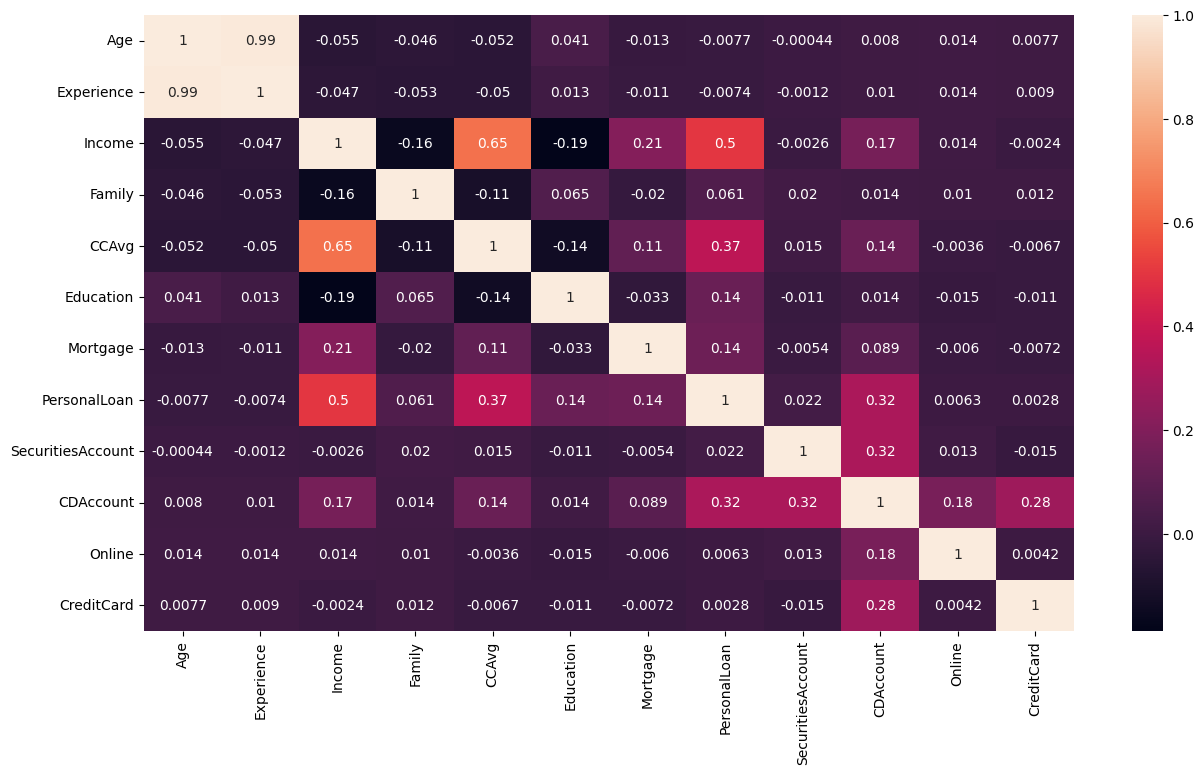

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [12]:
zero_class = df[df["CreditCard"] == 0]
one_class = df[df["CreditCard"] == 1]
print(zero_class.shape,one_class.shape)

(3530, 12) (1470, 12)


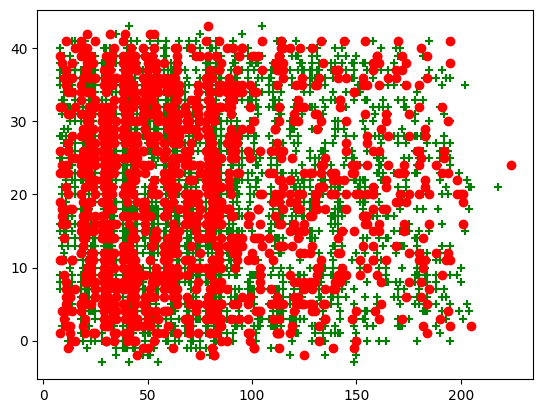

In [13]:
##income vs experience scatter plot 
plt.scatter(zero_class["Income"],
            zero_class["Experience"],
            color="green",marker="+")
plt.scatter(one_class["Income"],
            one_class["Experience"],
            color="red",marker="o")
plt.show()

In [ ]:
##ccavg vs family scatter plot

In [ ]:
##data scale -- aapko aapke data ko ek
#  range me leke aana hota hai 

##standard scaler -- sd - 1 , mean - 0 
# minmax scaler 


In [14]:
##standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit(df.drop("CreditCard",axis=1)).transform(
   df.drop("CreditCard",axis=1) 
)

# scaled = scaler.fit_transform(df.drop("CreditCard",axis=1))

df_scaled = pd.DataFrame(scaled,columns=df.columns[:-1])
df_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618


In [15]:
##x y split 
x = df_scaled
y = df[["CreditCard"]]

In [16]:
##svm implementation
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=0
)

In [19]:
svm = SVC()
svm.fit(x_train,y_train)

c:\Users\jaikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [20]:
svm.score(x_test,y_test)

0.749

In [21]:
svm.score(x_train,y_train)

0.74575

In [22]:
y_pred = svm.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[700,   4],
       [247,  49]], dtype=int64)

<Axes: >

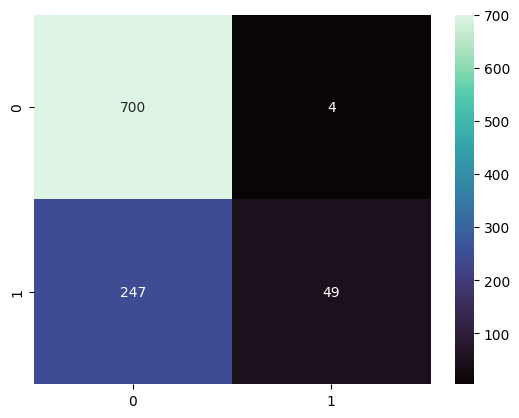

In [25]:
sns.heatmap(confusion_matrix(y_test,y_pred),
            annot=True,fmt="d",cmap="mako")

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000



In [28]:
##kernels in svm ---> linear,rbf,poly,sigmoid

#applying diff types of krnel 
## 1 - linear kernel 
from sklearn.svm import SVC
linear_svm = SVC(kernel="sigmoid")
linear_svm.fit(x_train,y_train)



c:\Users\jaikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='sigmoid')